<a href="https://colab.research.google.com/github/vashuverma/Crop-Prediction-Model/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
print("Shape of the Dataset :",data.shape)

Shape of the Dataset : (2200, 8)


In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
print("Average Ratio of Nitrogen in the Soil : {:.2f}".format(data['N'].mean()))
print("Average Ratio of Phosphorous in the Soil : {:.2f}".format(data['P'].mean()))
print("Average Ratio of Potassium in the Soil : {0:.2f}".format(data['K'].mean()))
print("Average Temperature in Celsius : {0:.2f}".format(data['temperature'].mean()))
print("Average Relative Humidity in % : {0:.2f}".format(data['humidity'].mean()))
print("Average PH value of the Soil : {0:.2f}".format(data['ph'].mean()))
print("Average Rainfall in mm : {0:.2f}".format(data['rainfall'].mean()))

Average Ratio of Nitrogen in the Soil : 50.55
Average Ratio of Phosphorous in the Soil : 53.36
Average Ratio of Potassium in the Soil : 48.15
Average Temperature in Celsius : 25.62
Average Relative Humidity in % : 71.48
Average PH value of the Soil : 6.47
Average Rainfall in mm : 103.46


In [ ]:
@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("..........................................................")
    print("Statistics for Nitrogen")
    print("Minimum Nitrogen Required :", x['N'].min())
    print("Average Nitrogen Required :", x['N'].mean())
    print("Maximum Nitrogen Required :", x['N'].max())
    print("..........................................................")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous Required :", x['P'].min())
    print("Average Phosphorous Required :", x['P'].mean())
    print("Maximum Phosphorous Required :", x['P'].max())
    print("..........................................................")
    print("Statistics for Potassium")
    print("Minimum Potassium Required :", x['K'].min())
    print("Average Potassium Required :", x['K'].mean())
    print("Maximum Potassium Required :", x['K'].max())
    print("..........................................................")
    print("Statistics for Temperature")
    print("Minimum Temperature Required : {:.2f}".format(x['temperature'].min()))
    print("Average Temperature Required : {:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature Required : {:.2f}".format(x['temperature'].max()))
    print("..........................................................")
    print("Statistics for Humidity")
    print("Minimum Humidity Required : {:.2f}".format(x['humidity'].min()))
    print("Average Humidity Required : {:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity Required : {:.2f}".format(x['humidity'].max()))
    print("..........................................................")
    print("Statistics for PH")
    print("Minimum PH Required : {:.2f}".format(x['ph'].min()))
    print("Average PH Required : {:.2f}".format(x['ph'].mean()))
    print("Maximum PH Required : {:.2f}".format(x['ph'].max()))
    print("..........................................................")
    print("Statistics for Rainfall")
    print("Minimum Rainfall Required : {:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall Required : {:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall Required : {:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [ ]:
print("Some Interesting Patterns")
print(".............................................")
print("Crops which requires very High Ratio of Nitrogen Content in Soil : ",data[data['N']>120]['label'].unique())
print("Crops which requires very High Ratio of Phosphorous Content in Soil : ",data[data['P']>100]['label'].unique())
print("Crops which requires very High Ratio of Pottassium Content in Soil : ",data[data['K']>200]['label'].unique())
print("Crops which requires very High Rainfall : ",data[data['rainfall']>200]['label'].unique())
print("Crops which requires very Low Temperature : ",data[data['temperature']<10]['label'].unique())
print("Crops which requires very High Temperature : ",data[data['temperature']>40]['label'].unique())
print("Crops which requires very Low Humidity : ",data[data['humidity']<20]['label'].unique())
print("Crops which requires very Low pH : ",data[data['ph']<4]['label'].unique())
print("Crops which requires very High pH : ",data[data['ph']>9]['label'].unique())


Some Interesting Patterns
.............................................
Crops which requires very High Ratio of Nitrogen Content in Soil :  ['cotton']
Crops which requires very High Ratio of Phosphorous Content in Soil :  ['grapes' 'apple']
Crops which requires very High Ratio of Pottassium Content in Soil :  ['grapes' 'apple']
Crops which requires very High Rainfall :  ['rice' 'papaya' 'coconut']
Crops which requires very Low Temperature :  ['grapes']
Crops which requires very High Temperature :  ['grapes' 'papaya']
Crops which requires very Low Humidity :  ['chickpea' 'kidneybeans']
Crops which requires very Low pH :  ['mothbeans']
Crops which requires very High pH :  ['mothbeans']


In [ ]:
print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("........................................................................................")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("........................................................................................")
print("Rainy Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
........................................................................................
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
........................................................................................
Rainy Crops
['rice' 'papaya' 'coconut']


In [ ]:
from sklearn.cluster import KMeans
x = data.drop(['label'], axis=1)
x = x.values
print(x.shape)

(2200, 7)


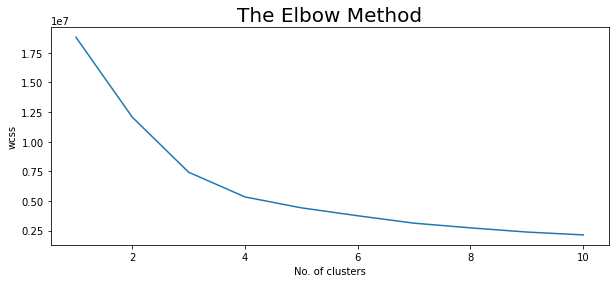

In [ ]:
plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300 ,n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method',fontsize = 20)
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means , a], axis=1)
z = z.rename(columns = {0: 'cluster'})

print("Lets check the Results after applying K Means clustering Analysis \n")
print("Crops in First Cluster : ", z[z['cluster']==0]['label'].unique())
print(".............................................................................")
print("Crops in Second Cluster : ", z[z['cluster']==1]['label'].unique())
print(".............................................................................")
print("Crops in Third Cluster : ", z[z['cluster']==2]['label'].unique())
print(".............................................................................")
print("Crops in Fourth Cluster : ", z[z['cluster']==3]['label'].unique())

Lets check the Results after applying K Means clustering Analysis 

Crops in First Cluster :  ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
.............................................................................
Crops in Second Cluster :  ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
.............................................................................
Crops in Third Cluster :  ['grapes' 'apple']
.............................................................................
Crops in Fourth Cluster :  ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [ ]:
y = data['label']
x = data.drop(['label'],axis = 1)

print("Shape of x : ", x.shape)
print("Shape of y : ", y.shape)

Shape of x :  (2200, 7)
Shape of y :  (2200,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

print("The Shape of x train : ", x_train.shape)
print("The Shape of x test : ", x_test.shape)
print("The Shape of y train : ", y_train.shape)
print("The Shape of y test : ", y_test.shape)

The Shape of x train :  (1760, 7)
The Shape of x test :  (440, 7)
The Shape of y train :  (1760,)
The Shape of y test :  (440,)


In [ ]:
#logistic regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


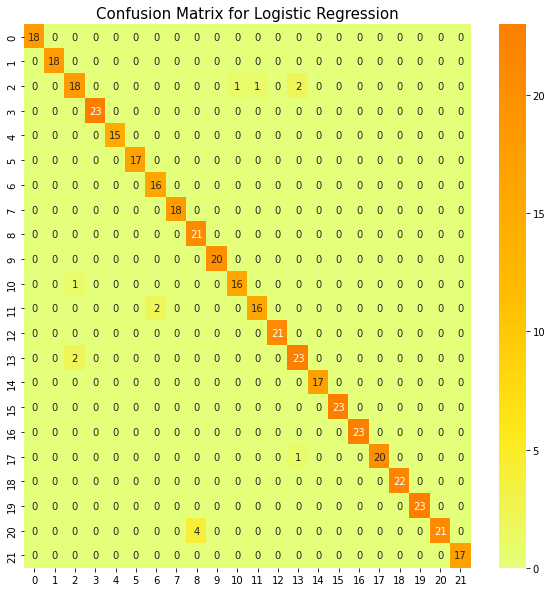

In [ ]:
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot = True ,cmap = 'Wistia')
plt.title('Confusion Matrix for Logistic Regression',fontsize = 15)
plt.show()

In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
prediction = model.predict((np.array([[50,
                                      52,
                                      17,
                                      24,
                                      65,
                                      5,
                                      75]])))
print("The Suggested crop for Given Climatic Condition is : ",prediction)

The Suggested crop for Given Climatic Condition is :  ['blackgram']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


# New Section